In [2]:
import random
from pathlib import Path
from math import sqrt, pi

import numpy as np
from scipy.stats import ttest_rel, ttest_ind
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import seaborn as sns

%matplotlib inline

In [13]:
# Load in all csv result files & combine them to one pandas table
wells = ['C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16',
         'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16',
         'E04', 'E05', 'E06', 'E07', 'E08', 'F04', 'F05', 'F06', 'F07', 'F08']

base_path = '../results/run1_randomSampling_uniform/NearestNeighborResults_'

results = pd.DataFrame()

for well in wells:
    curr_well = pd.read_csv(base_path + well + '.csv')
    results = pd.concat([results, curr_well])

array(['Area_of_Cytoplasm', 'Label',
       'Mean_Of_mean_nn_distances_simulated_10',
       'Mean_Of_mean_nn_distances_simulated_100',
       'Mean_Of_mean_nn_distances_simulated_1000',
       'Mean_nn_distances_measured', 'Mean_nn_distances_simulated',
       'Number_of_pbodies', 'SiteX', 'SiteY', 'Well',
       'p-value_measured_lower_1000_sim'], dtype=object)

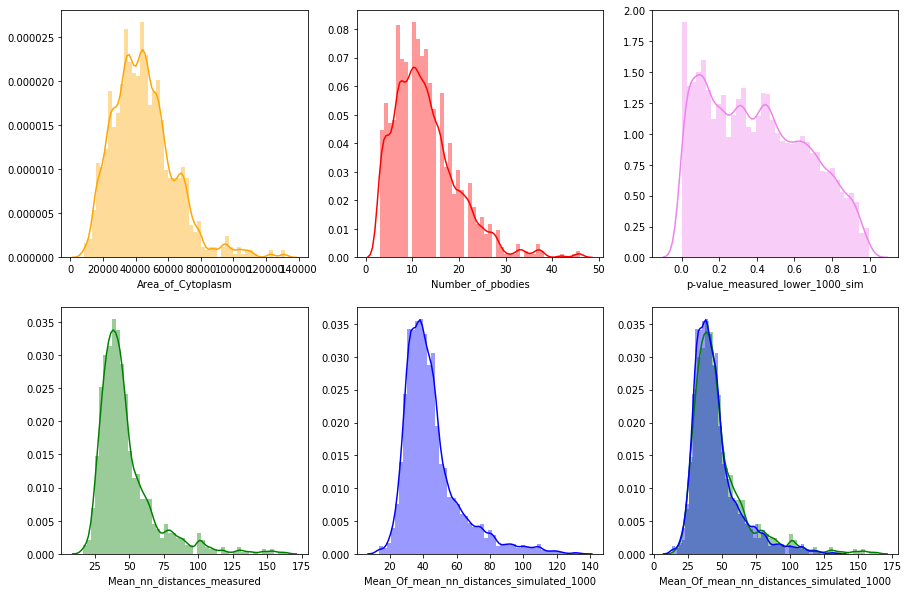

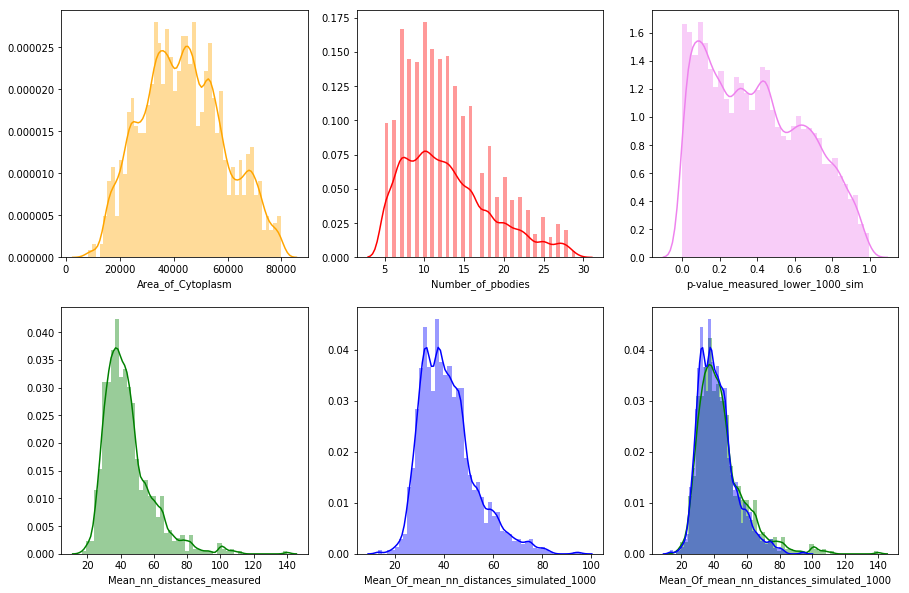

In [46]:
# Filter out outliers in numbers of P bodies
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
sns.distplot(results['Area_of_Cytoplasm'], ax=ax[0][0], color='orange')
sns.distplot(results['Number_of_pbodies'], ax=ax[0][1], color='red')
sns.distplot(results['p-value_measured_lower_1000_sim'], ax=ax[0][2], color='violet')
sns.distplot(results['Mean_nn_distances_measured'], ax=ax[1][0], color='green')
sns.distplot(results['Mean_Of_mean_nn_distances_simulated_1000'], ax=ax[1][1], color='blue')
sns.distplot(results['Mean_nn_distances_measured'], ax=ax[1][2], color='green')
sns.distplot(results['Mean_Of_mean_nn_distances_simulated_1000'], ax=ax[1][2], color='blue')

# select rows where `Area_of_Cytoplasm` has value > 80'000
normal_size = (results['Area_of_Cytoplasm'] < 80000)
normal_pbodies = (results['Number_of_pbodies'] >= 5)
normal_pbodies2 = (results['Number_of_pbodies'] < 30)

# extract those rows into a new table
results_cleaned = results.loc[good_rows & normal_pbodies & normal_pbodies2]
fig2, ax2 = plt.subplots(2, 3, figsize=(15, 10))
sns.distplot(results_cleaned['Area_of_Cytoplasm'], ax=ax2[0][0], color='orange')
sns.distplot(results_cleaned['Number_of_pbodies'], ax=ax2[0][1], color='red')
sns.distplot(results_cleaned['p-value_measured_lower_1000_sim'], ax=ax2[0][2], color='violet')
sns.distplot(results_cleaned['Mean_nn_distances_measured'], ax=ax2[1][0], color='green')
sns.distplot(results_cleaned['Mean_Of_mean_nn_distances_simulated_1000'], ax=ax2[1][1], color='blue')
sns.distplot(results_cleaned['Mean_nn_distances_measured'], ax=ax2[1][2], color='green')
sns.distplot(results_cleaned['Mean_Of_mean_nn_distances_simulated_1000'], ax=ax2[1][2], color='blue')

# Make histograms for 
results.columns.values

In [47]:
# Run paired t-test to compare mean-nn distances measured with Mean of 1000 simulation means
ttest_rel(results_cleaned['Mean_nn_distances_measured'], results_cleaned['Mean_Of_mean_nn_distances_simulated_1000'])

Ttest_relResult(statistic=57.6262782608453, pvalue=0.0)

-2.7631776123598897

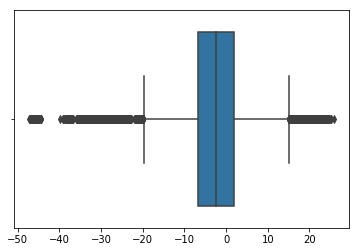

In [51]:
# plot difference measured to predicted
difference_in_nearest_neighbour_1000 = results_cleaned['Mean_Of_mean_nn_distances_simulated_1000'] - results_cleaned['Mean_nn_distances_measured']

sns.boxplot(difference_in_nearest_neighbour_1000)

np.mean(difference_in_nearest_neighbour_1000)

In [ ]:
# Compare results from 1, 10, 100 & 1000 simulations